### Visualisation of the data

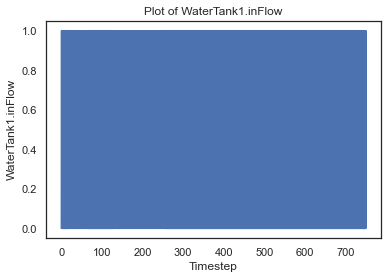

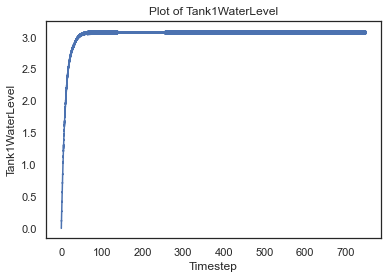

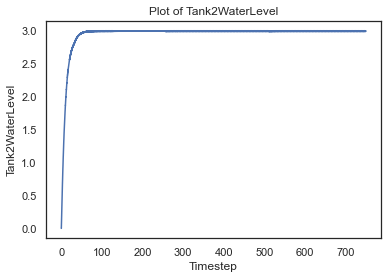

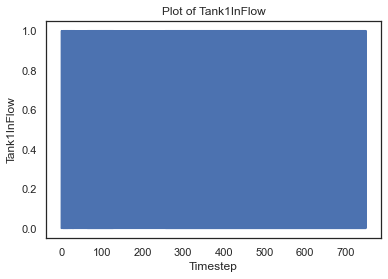

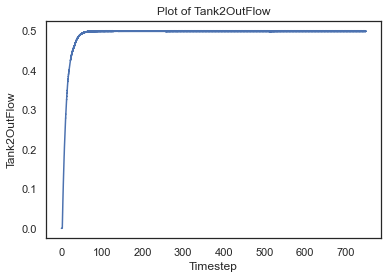

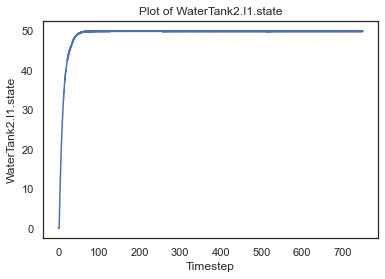

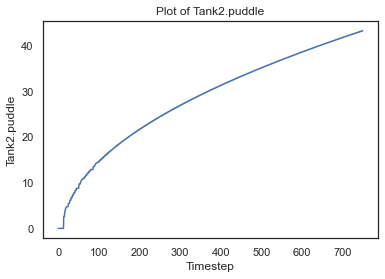

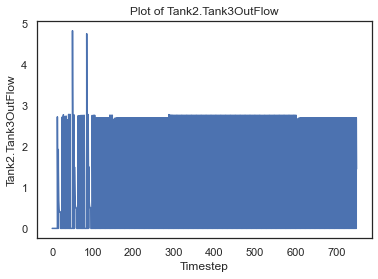

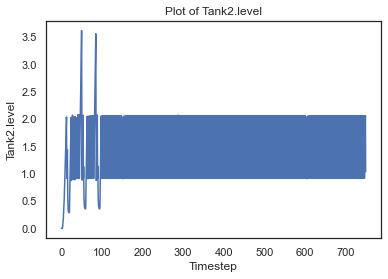

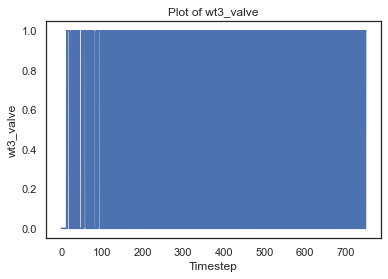

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

# mydata = read_csv('waterTankNew.csv', header=0, index_col=0)
# mydata = read_csv('waterTank_stuckAt.csv', header=0, index_col=0)
mydata = read_csv('Stuck_At_All_Features.csv', header=0, index_col=0)
# attr = ["wt3_valve", "Tank1InFlow", "Tank1WaterLevel", "Tank3OutFlow", "Tank2.level"]
# attr = ["Tank1WaterLevel", "Tank2WaterLevel", "Tank2OutFlow", "Tank3OutFlow", "Tank2.level", "wt3_valve"]
attr = ["WaterTank1.inFlow", "Tank1WaterLevel", "Tank2WaterLevel", "Tank1InFlow", "Tank2OutFlow", "WaterTank2.I1.state", "Tank2.puddle", "Tank2.Tank3OutFlow", "Tank2.level", "wt3_valve"]
for i in range(len(attr)):
    title = "Plot of "+str(attr[i])
    actual = mydata.iloc[:2000,i]
    actual = mydata.iloc[:,i]
#     actual = mydata.iloc[750:1000,i]
    plt.title(title)
    plt.xlabel("Timestep")
    plt.ylabel(attr[i])
#     plt.plot(actual, label="original")
    plt.plot(actual)
#     plt.legend()
    plt.show()

### Pairwise correlations

In [35]:
corr_matrix = mydata[attr].corr(method='pearson')
# print the correlation matrix
print(corr_matrix)

                     WaterTank1.inFlow  Tank1WaterLevel  Tank2WaterLevel  \
WaterTank1.inFlow             1.000000         0.019578        -0.014962   
Tank1WaterLevel               0.019578         1.000000         0.998083   
Tank2WaterLevel              -0.014962         0.998083         1.000000   
Tank1InFlow                   1.000000         0.019578        -0.014962   
Tank2OutFlow                 -0.015305         0.995967         0.998255   
WaterTank2.I1.state          -0.015305         0.995967         0.998255   
Tank2.puddle                 -0.004034         0.423996         0.424643   
Tank2.Tank3OutFlow           -0.001367         0.066652         0.066734   
Tank2.level                  -0.001236         0.341942         0.342517   
wt3_valve                     0.001183         0.049832         0.049817   

                     Tank1InFlow  Tank2OutFlow  WaterTank2.I1.state  \
WaterTank1.inFlow       1.000000     -0.015305            -0.015305   
Tank1WaterLevel      

In [36]:
corr_matrix = mydata[attr].corr(method='spearman')
# print the correlation matrix
print(corr_matrix)

                     WaterTank1.inFlow  Tank1WaterLevel  Tank2WaterLevel  \
WaterTank1.inFlow             1.000000         0.305837        -0.690041   
Tank1WaterLevel               0.305837         1.000000         0.279742   
Tank2WaterLevel              -0.690041         0.279742         1.000000   
Tank1InFlow                   1.000000         0.305837        -0.690041   
Tank2OutFlow                 -0.721068        -0.049151         0.913629   
WaterTank2.I1.state          -0.721035        -0.049083         0.913649   
Tank2.puddle                 -0.003009         0.240080         0.291376   
Tank2.Tank3OutFlow            0.000093         0.006864         0.001122   
Tank2.level                   0.002431         0.061705         0.070348   
wt3_valve                     0.001183        -0.000831        -0.009872   

                     Tank1InFlow  Tank2OutFlow  WaterTank2.I1.state  \
WaterTank1.inFlow       1.000000     -0.721068            -0.721035   
Tank1WaterLevel      

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

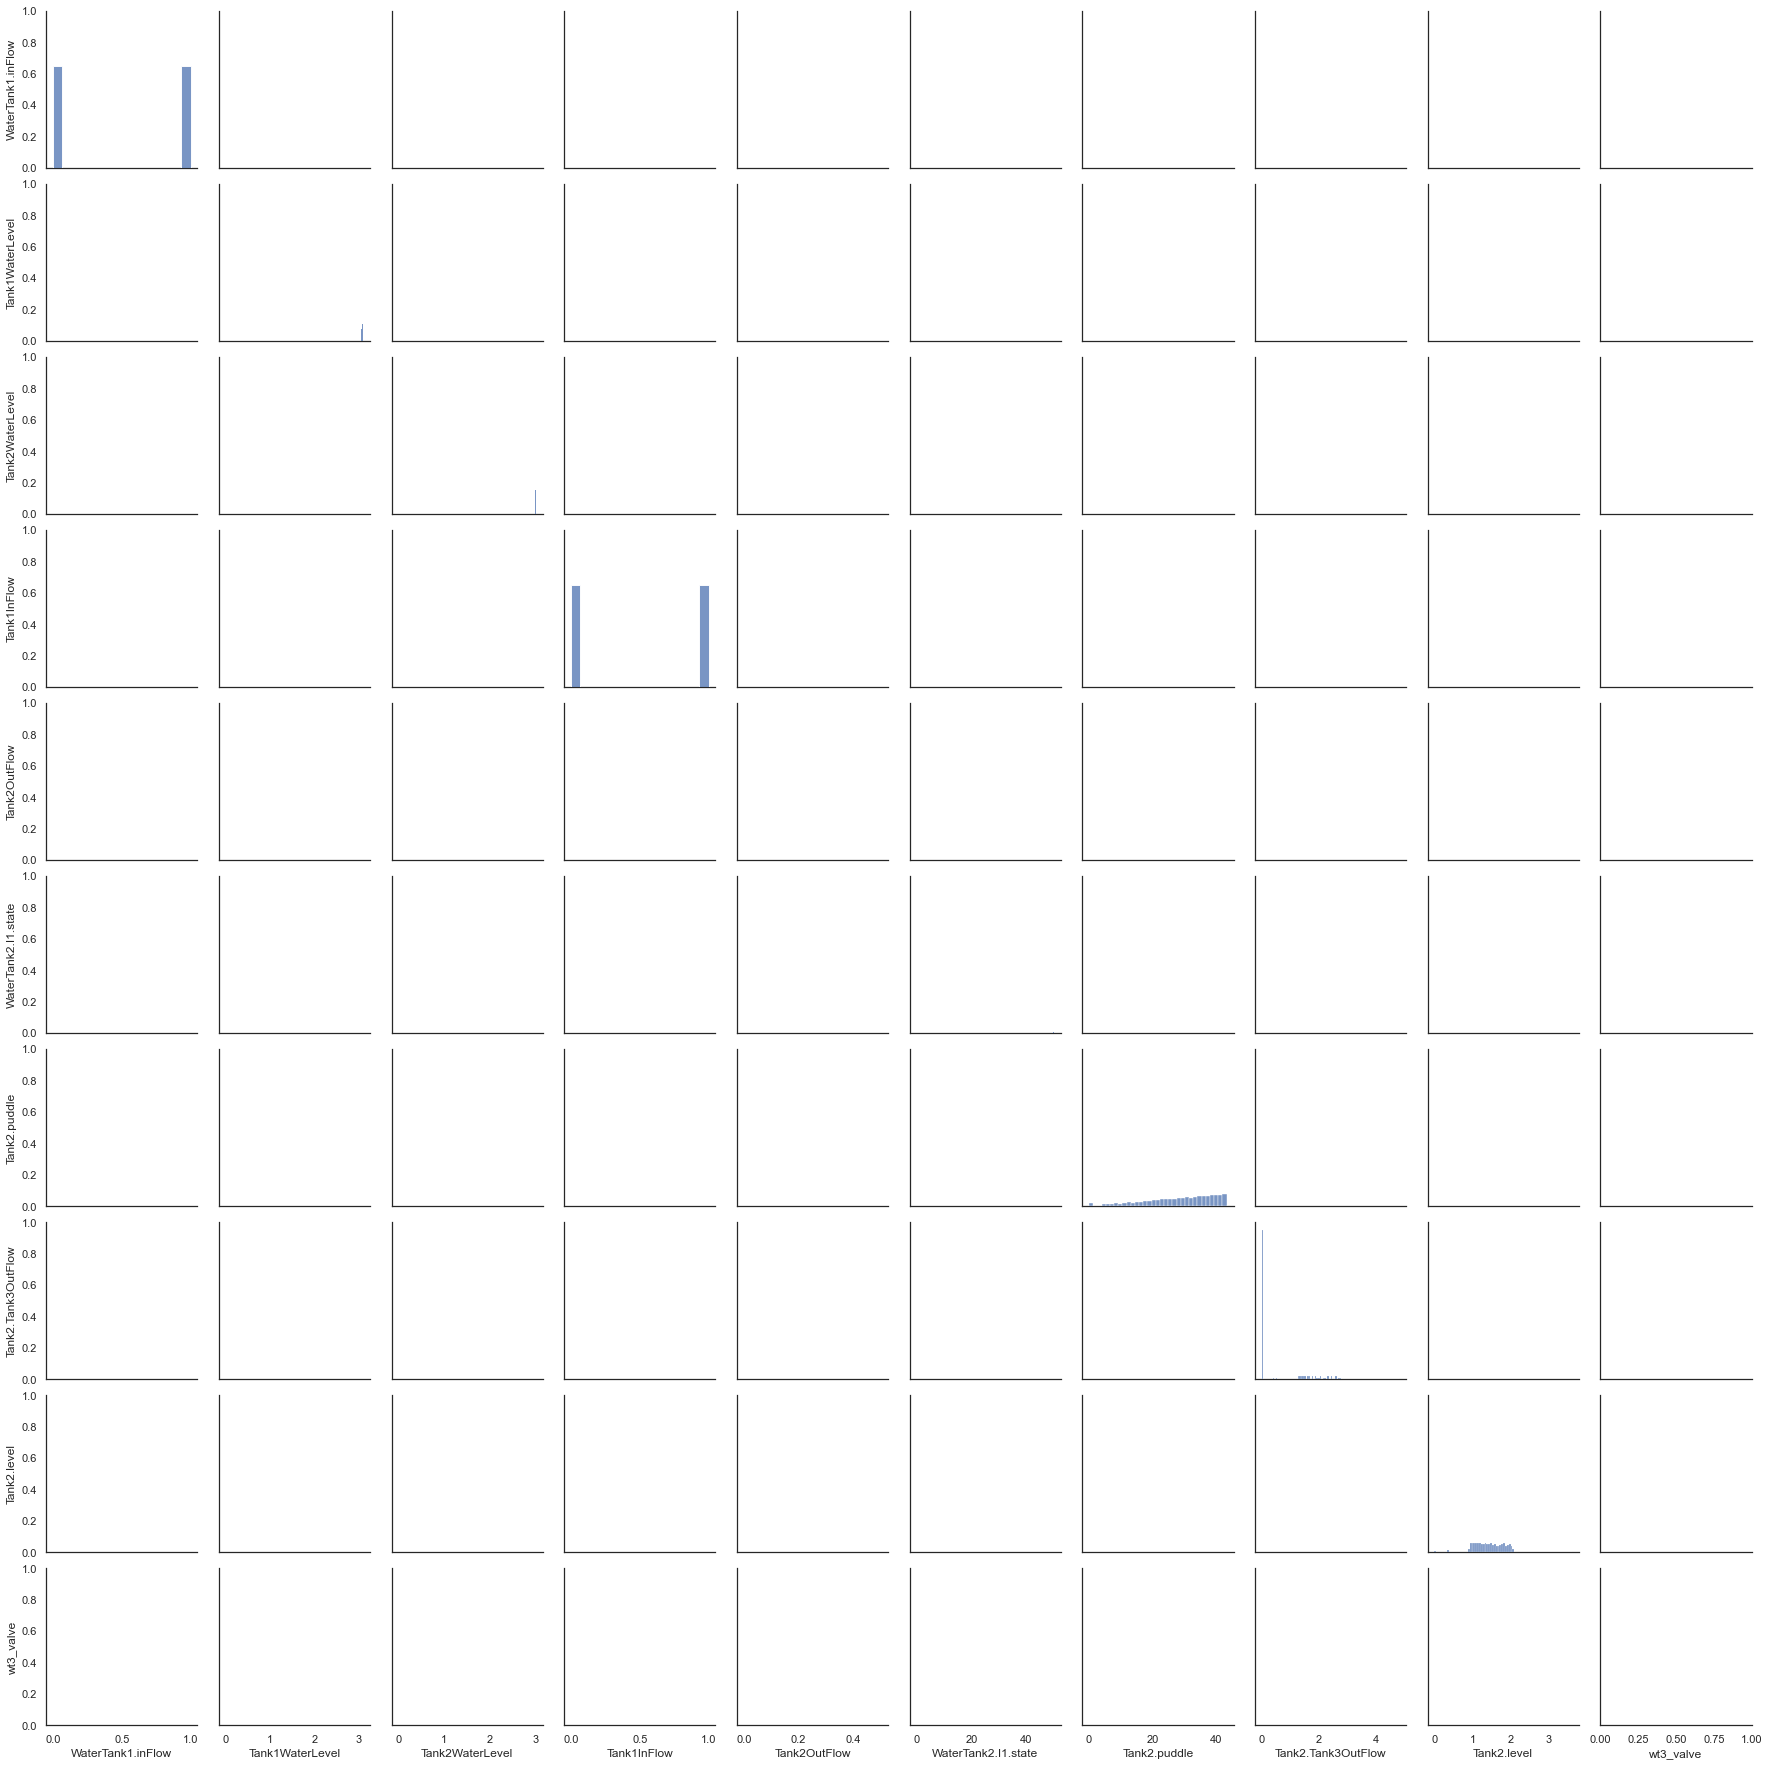

In [38]:
### Pair-plot of the time series
import seaborn as sns
sns.pairplot(mydata)

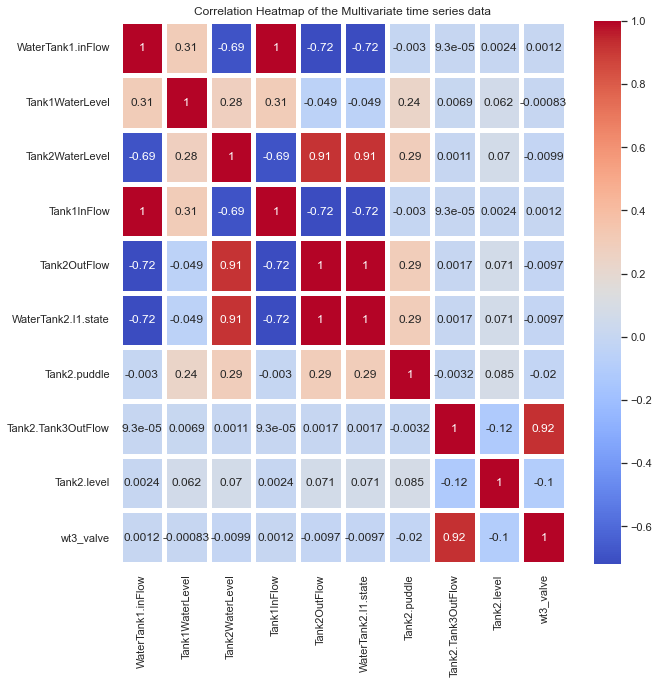

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, linewidths=5, ax=ax)
plt.title("Correlation Heatmap of the Multivariate time series data")
plt.show()

### Find how many lags are statistically significant from each series

#### We can use autocorrelation and partial autocorrelation

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by sett

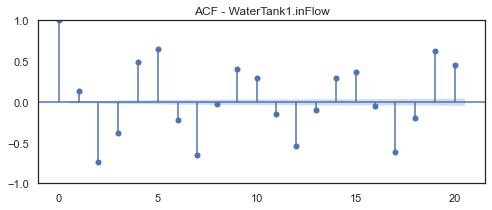

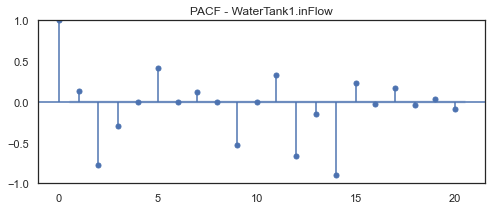

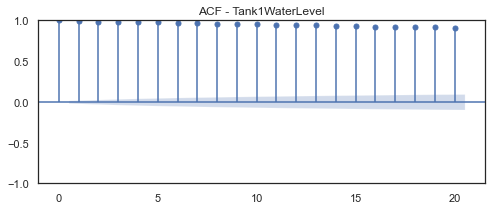

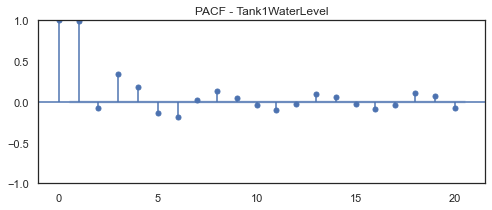

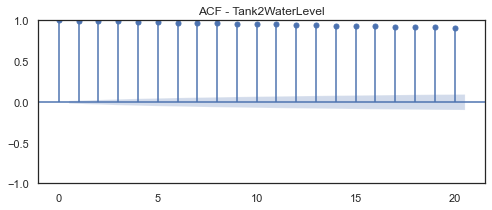

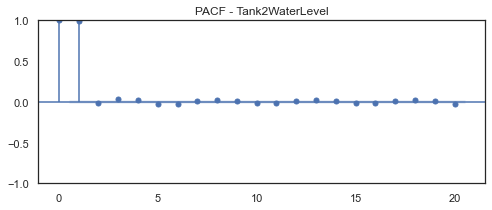

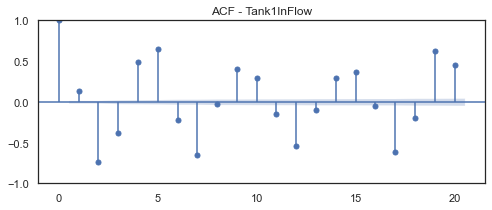

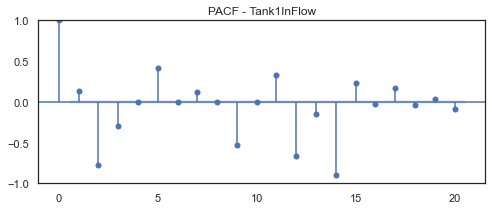

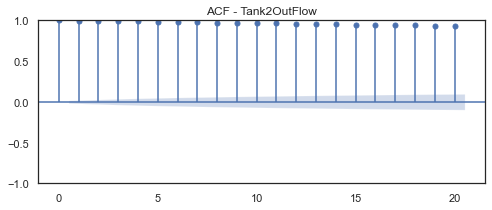

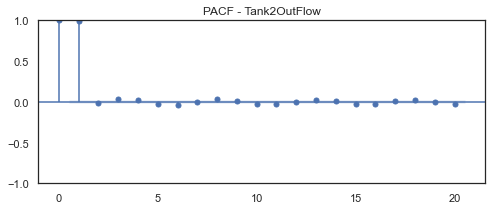

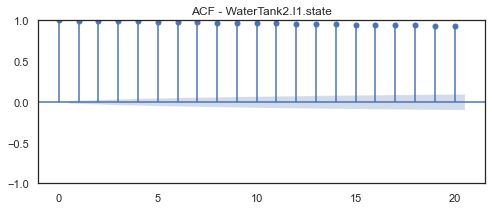

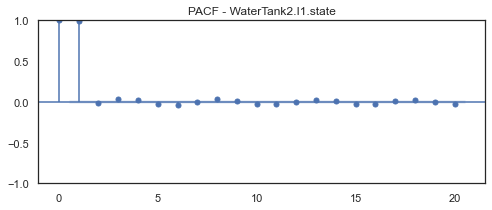

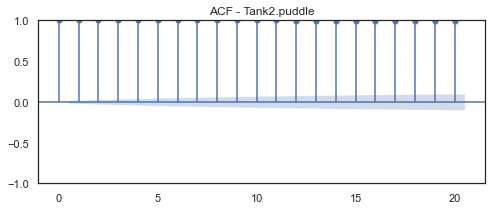

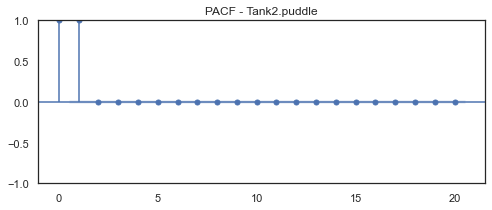

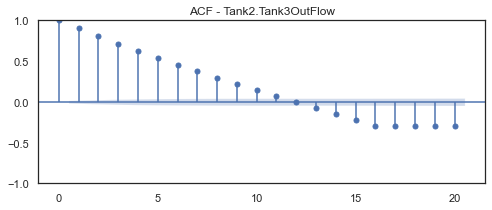

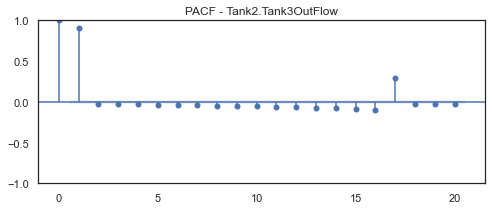

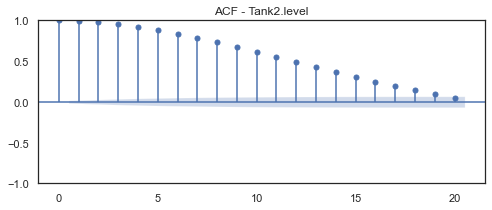

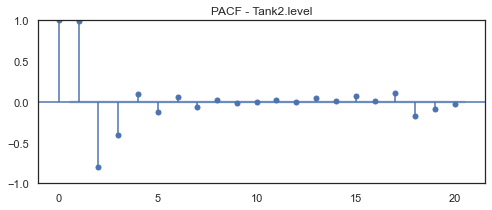

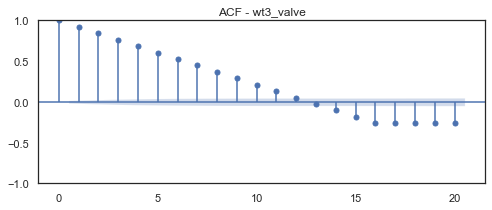

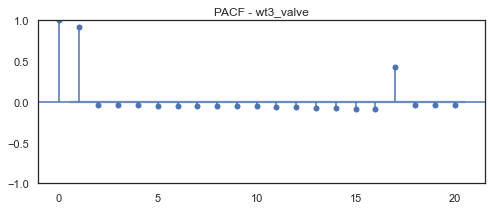

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for col in mydata.columns:
    fig, ax = plt.subplots(figsize=(8,3))
    plot_acf(mydata[col], lags=20, ax=ax, title=f'ACF - {col}')
    fig, ax = plt.subplots(figsize=(8,3))
    plot_pacf(mydata[col], lags=20, ax=ax, title=f'PACF - {col}')

### Granger Causality Analysis

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Load the time series data into a pandas DataFrame
# df = read_csv('waterTank_stuckAt.csv')
df = read_csv('trig.csv')

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
print(train_size)
train_data = df[:train_size]
test_data = df[train_size:]

# Define the lag order
lag_order = 2

# Fit the Granger causality model using the training set
granger_model = grangercausalitytests(train_data, lag_order, verbose=False)

# Test the model's performance using the testing set
results = []
for i in range(lag_order, len(test_data)):
    x = test_data.iloc[i-lag_order:i, 0].values
    y = test_data.iloc[i-lag_order:i, 1].values
    predicted_y = granger_model[lag_order][0].params[1] + \
    granger_model[lag_order][0].params[3] * x[-1] + \
    granger_model[lag_order][0].params[4] * y[-1]
    actual_y = test_data.iloc[i, 1]
    results.append((actual_y, predicted_y))
    
# Evaluate the results using statistical tests
actual_values = [r[0] for r in results]
predicted_values = [r[1] for r in results]
f_test = granger_model[lag_order][0].f_test([[0, 1, 0, 0, 0]])
p_value = f_test[1][0][0]

# Print the results
print('Granger causality results:')
print(f'F-test statistic: {f_test[0][0][0]:.2f}')
print(f'p-value: {p_value:.4f}')
print(f'R-squared: {granger_model[lag_order][0].rsquared:.2f}')